In [1]:
! pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 52kB/s 


In [2]:
! pip install keras

In [3]:
! pip install pandas

In [4]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.3.1
Hub version: 0.9.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [5]:
#from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D
#from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
#from tensorflow.keras.models import Model
#from tensorflow.keras.preprocessing import image
#from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
#from tensorflow.keras.models import Sequential
#from glob import glob

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error


In [6]:
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, r2_score
import os
import cv2

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
file1="/content/drive/My Drive/Colab Notebooks/Google Stock Price/trainset.csv"
file2="/content/drive/My Drive/Colab Notebooks/Google Stock Price/testset.csv"


In [16]:
import pandas as pd
df_train=pd.read_csv(file1,index_col='Date', parse_dates=['Date'])
df_train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...
2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900


In [17]:
df_train.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [18]:
df_train.shape

(1259, 6)

In [19]:
df_train.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

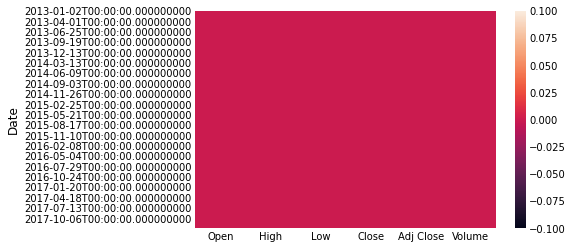

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(df_train.isnull())

In [74]:
# Checking for missing values
training_set = df_train.iloc[:,0:1].values
training_set


array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [75]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [76]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,1259):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [77]:
X_train.shape

(1199, 60)

In [78]:
y_train.shape

(1199,)

In [79]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1199, 60, 1)

In [87]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0299
Epoch 2/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0048
Epoch 3/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0035
Epoch 4/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0037
Epoch 5/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0033
Epoch 6/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0030
Epoch 7/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0033
Epoch 8/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0028
Epoch 9/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0031
Epoch 10/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0032
Epoch 11/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0030
Epoch 12/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0028
Epoch 13/100
38/38 [=====

In [88]:
import pandas as pd
df_test=pd.read_csv(file2,index_col='Date', parse_dates=['Date'])
df_test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600
...,...,...,...,...,...,...
2018-06-25,1143.599976,1143.910034,1112.780029,1124.810059,1124.810059,2157300
2018-06-26,1128.000000,1133.209961,1116.659058,1118.459961,1118.459961,1563200
2018-06-27,1121.339966,1131.836060,1103.619995,1103.979980,1103.979980,1293900


In [89]:
real_stock_price = df_test.iloc[:,0:1].values
real_stock_price

array([[1048.339966],
       [1064.310059],
       [1088.      ],
       [1094.      ],
       [1102.22998 ],
       [1109.400024],
       [1097.099976],
       [1106.300049],
       [1102.410034],
       [1132.51001 ],
       [1126.219971],
       [1131.410034],
       [1131.829956],
       [1137.48999 ],
       [1159.849976],
       [1177.329956],
       [1172.530029],
       [1175.079956],
       [1176.47998 ],
       [1167.829956],
       [1170.569946],
       [1162.609985],
       [1122.      ],
       [1090.599976],
       [1027.180054],
       [1081.540039],
       [1055.410034],
       [1017.25    ],
       [1048.      ],
       [1045.      ],
       [1048.949951],
       [1079.069946],
       [1088.410034],
       [1090.569946],
       [1106.469971],
       [1116.189941],
       [1112.640015],
       [1127.800049],
       [1141.23999 ],
       [1123.030029],
       [1107.869995],
       [1053.079956],
       [1075.140015],
       [1099.219971],
       [1089.189941],
       [11

In [90]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'Open' attribute data for processing
dataset_total = pd.concat((df_train["Open"],df_test["Open"]),axis=0)
inputs = dataset_total.iloc[1199:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)
inputs.shape


(185, 1)

In [91]:
X_test = []
for i in range(60,185):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[1038.6207 ],
       [1036.5087 ],
       [1038.1293 ],
       [1045.7637 ],
       [1056.3746 ],
       [1067.2788 ],
       [1076.7662 ],
       [1081.1802 ],
       [1083.0586 ],
       [1082.8958 ],
       [1086.8657 ],
       [1092.0514 ],
       [1097.4924 ],
       [1101.9116 ],
       [1105.7346 ],
       [1112.2859 ],
       [1122.2928 ],
       [1131.347  ],
       [1137.9387 ],
       [1141.9097 ],
       [1142.347  ],
       [1141.4044 ],
       [1139.091  ],
       [1130.2516 ],
       [1114.5172 ],
       [1088.576  ],
       [1070.5576 ],
       [1058.8861 ],
       [1047.1588 ],
       [1041.5803 ],
       [1040.5806 ],
       [1042.529  ],
       [1049.994  ],
       [1060.3779 ],
       [1069.814  ],
       [1078.5022 ],
       [1086.2484 ],
       [1091.0463 ],
       [1095.4149 ],
       [1101.0814 ],
       [1103.4761 ],
       [1100.7296 ],
       [1086.8944 ],
       [1072.9644 ],
       [1067.1842 ],
       [1066.8622 ],
       [1073.6704 ],
       [1086.

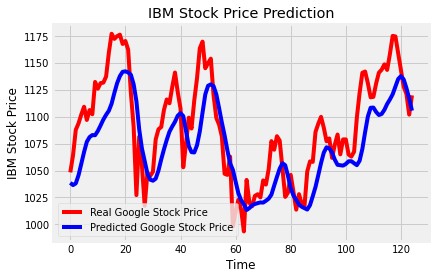

In [92]:
plt.plot(real_stock_price, color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted Google Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

In [94]:
rmse = math.sqrt(mean_squared_error(real_stock_price,predicted_stock_price))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 33.344406529971245.
